Additional setting - Connect -> Change runtime type -> change hardware accelerator to GPU


In [86]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import zipfile
import os
#from tensorflow.keras.optimizers import RMSprop

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [87]:
tf.random.set_seed(42)
print("TensorFlow version: ",tf.__version__)

TensorFlow version:  2.19.0


Download dataset from Kaggle.com

In [88]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [89]:
with zipfile.ZipFile('face-mask-dataset.zip','r') as zip_ref:
  zip_ref.extractall(".")

In [90]:
base_dir="data"
print("Dataset Folders: ",os.listdir(base_dir))

Dataset Folders:  ['with_mask', 'without_mask']


In [91]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2
                            )
train_data=datagen.flow_from_directory(base_dir, target_size=(224,224), batch_size=32, class_mode='binary',
                                       subset='training', seed=42)

Found 6043 images belonging to 2 classes.


In [92]:
test_data=datagen.flow_from_directory(base_dir, target_size=(224,224), batch_size=32, class_mode='binary',
                                       subset='validation', seed=42)

Found 1510 images belonging to 2 classes.


In [93]:
#Creating CNN model
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(16,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.Conv2D(32,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Conv2D(64,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.3), #used to prevent overfitting
    tf.keras.layers.Dense(1,activation='sigmoid')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [95]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 220, 220, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 108, 108, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 106, 106, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 53, 53, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 51, 51, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │     2,560,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,595,281 (9.90 MB)

 Trainable params: 2,595,281 (9.90 MB)

 Non-trainable params: 0 (0.00 B)

In [96]:
history=model.fit(train_data, epochs=5, validation_data=test_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
 31/189 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.4888 - loss: 0.7525

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 25s 107ms/step - accuracy: 0.7051 - loss: 0.5299 - val_accuracy: 0.8821 - val_loss: 0.2703
Epoch 2/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.8833 - loss: 0.2844 - val_accuracy: 0.9219 - val_loss: 0.2228
Epoch 3/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.9014 - loss: 0.2323 - val_accuracy: 0.9391 - val_loss: 0.1920
Epoch 4/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.9262 - loss: 0.1902 - val_accuracy: 0.9457 - val_loss: 0.1644
Epoch 5/5
189/189 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9455 - loss: 0.1441 - val_accuracy: 0.9325 - val_loss: 0.1798


In [97]:
#Evaluate
loss,accuracy=model.evaluate(test_data)
print("Loss: ",{loss})
print("Accuracy: ",{accuracy})

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9356 - loss: 0.1697
Loss:  {0.1798495650291443}
Accuracy:  {0.9324503540992737}


/tmp/ipython-input-3116375766.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-3116375766.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


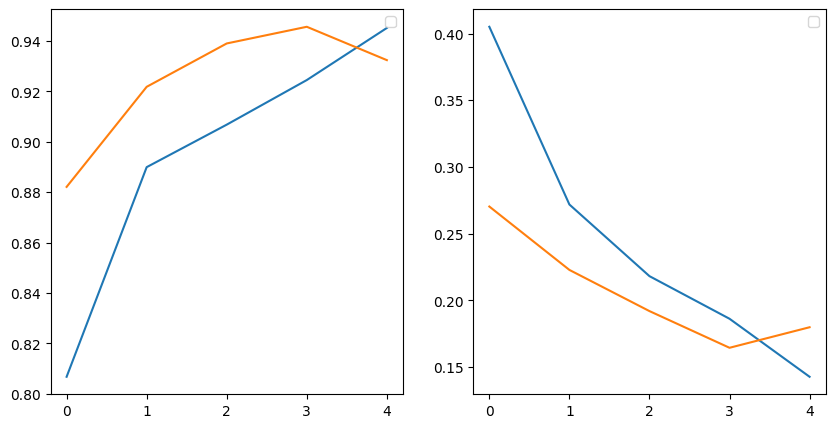

In [98]:
#Plot accuracy and loss
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step


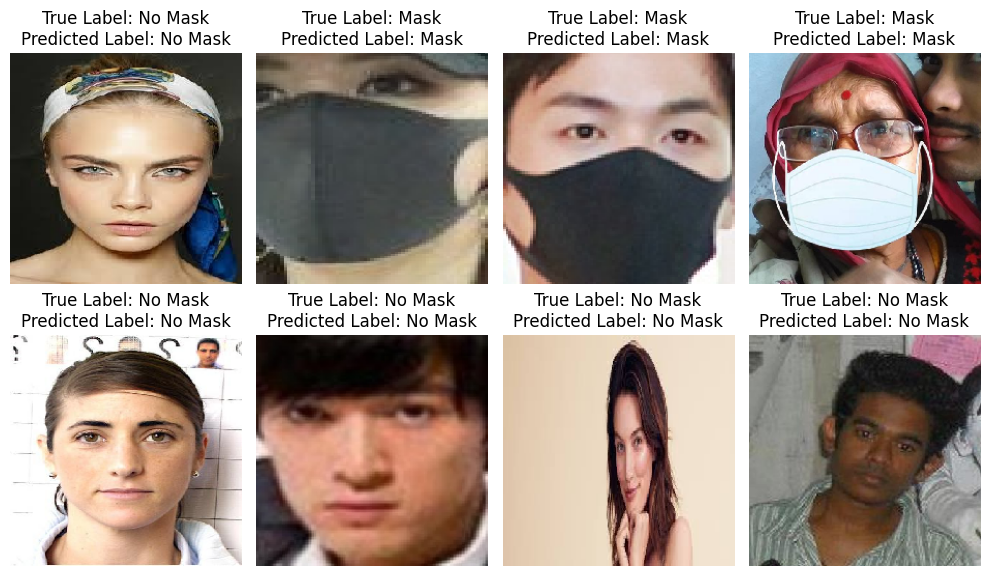

In [99]:
images,labels=next(test_data)
predictions=model.predict(images)
plt.figure(figsize=(10,6))
for i in range(8):
  plt.subplot(2,4,i+1)
  plt.imshow(images[i])
  true_label="Mask" if labels[i]==0 else "No Mask"
  predicted_label="Mask" if predictions[i]<0.5 else "No Mask"
  plt.title(f"True Label: {true_label}\nPredicted Label: {predicted_label}")
  plt.axis('off')

plt.tight_layout()
plt.show()

Saving Welsh-actress-Catherine-Zeta-Jones-2022.jpg.webp to Welsh-actress-Catherine-Zeta-Jones-2022.jpg.webp
File uploaded:  Welsh-actress-Catherine-Zeta-Jones-2022.jpg.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
Prediction:  No Mask
Confidence:  99.98536 %


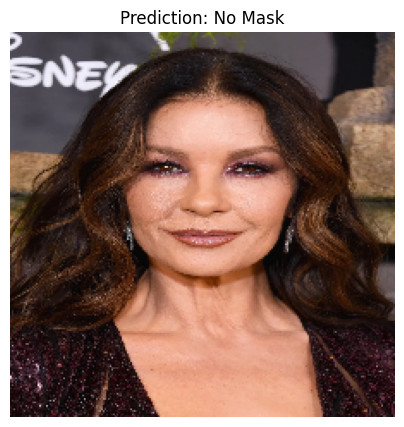

In [100]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  img_path=fn
  print("File uploaded: ",img_path)
  img=image.load_img(img_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  img_array=np.expand_dims(img_array,axis=0)/255.0


  pred=model.predict(img_array)[0][0]
  label="Mask" if pred<0.5 else "No Mask"
  print("Prediction: ",label)
  print("Confidence: ",100*(1-pred) if pred<0.5 else 100*pred, "%")

  plt.figure(figsize=(5,5))
  plt.imshow(img)
  plt.title(f"Prediction: {label}")
  plt.axis('off')
  plt.show()